# General analysis from association rules

## Run all year-by-year notebooks to generate association rules

### Run analysis for 2018

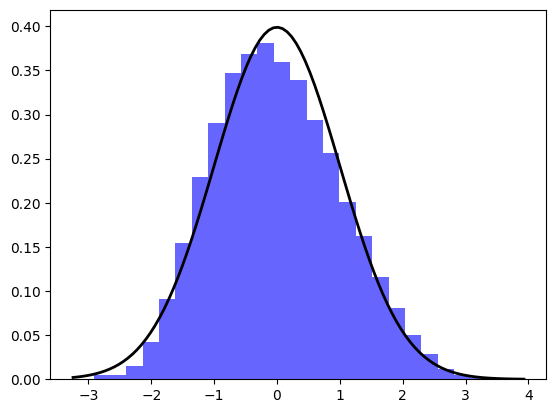

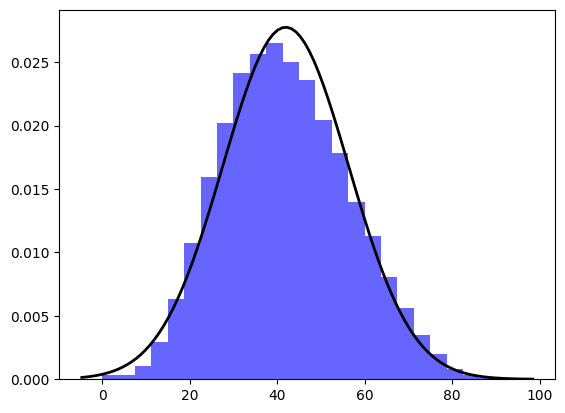

Time to run apriori: 0:20:15.915329
Time to run extractor: 0:00:07.432227
Count of itemsets: 23235
Count of association rules for support 10.0% and confidence 50.0%: 582712


In [1]:
%run 'analysis-2018.ipynb'

### Run analysis for 2019

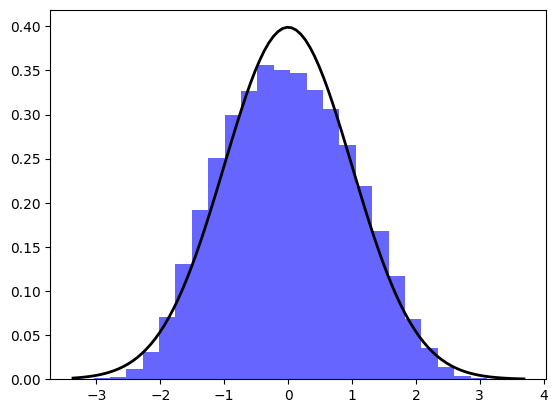

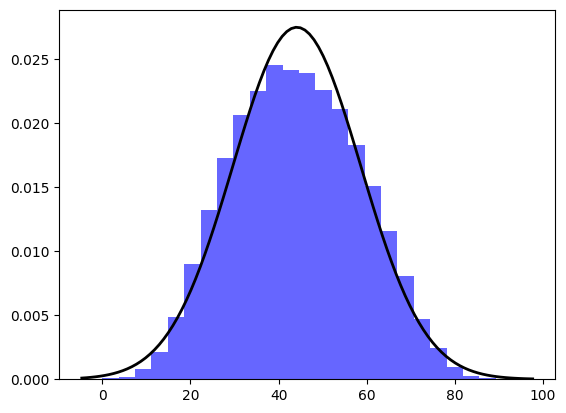

Time to run apriori: 0:42:21.897081
Time to run extractor: 0:00:20.697966
Count of itemsets: 39812
Count of association rules for support 10.0% and confidence 50.0%: 1686864


In [2]:
%run 'analysis-2019.ipynb'

## Import all rules results

In [3]:
%run '../scripts/import-all-rules-results.py'

all_rules

,items_base,items_add,support,confidence,lift,year
0,[],['Bacharelado'],0.870748,0.870748,1.000000,2018
1,[],['Branca'],0.602673,0.602673,1.000000,2018
2,[],['EM: Todo em escola pública'],0.526522,0.526522,1.000000,2018
3,[],['Entre 17 e 25 anos'],0.548346,0.548346,1.000000,2018
4,[],['Feminino'],0.551497,0.551497,1.000000,2018
...,...,...,...,...,...,...
2269571,"['Universidade', 'Branca', 'Não entrei por cot...",['NOTA: MUITO ACIMA DA MÉDIA'],0.104655,0.963542,1.652969,2019
2269572,"['Universidade', 'Branca', 'Não entrei por cot...",['Entre 17 e 25 anos'],0.104655,0.811404,1.471754,2019
2269573,"['Universidade', 'Branca', 'Não entrei por cot...",['EM: Todo em escola privada (particular)'],0.104655,0.848624,2.136495,2019
2269574,"['Universidade', 'Não entrei por cotas', 'Bach...",['Branca'],0.104655,0.755543,1.340947,2019


## ECDF - Support x Association Rules Qty

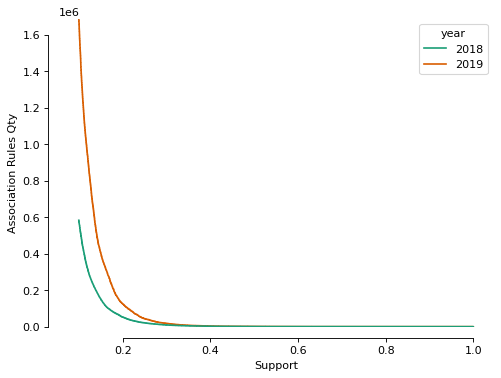

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_rules, stat="count", complementary=True, x="support", hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty

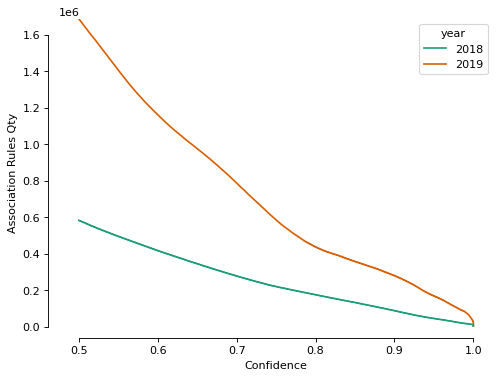

In [5]:
# charts
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confidence")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Support x Association Rules Qty - NOTA MUITO ACIMA DA MÉDIA

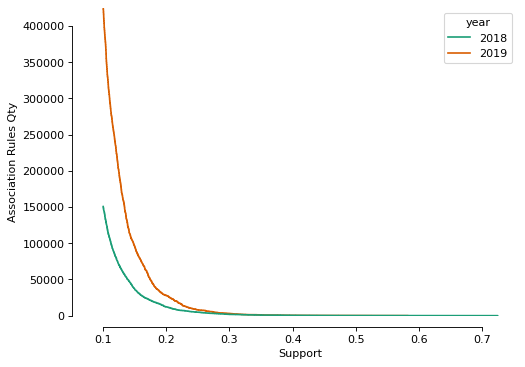

In [6]:
all_high_performance_rules = all_rules.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_high_performance_rules, stat="count", x="support", complementary=True,  hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty - NOTA MUITO ACIMA DA MÉDIA

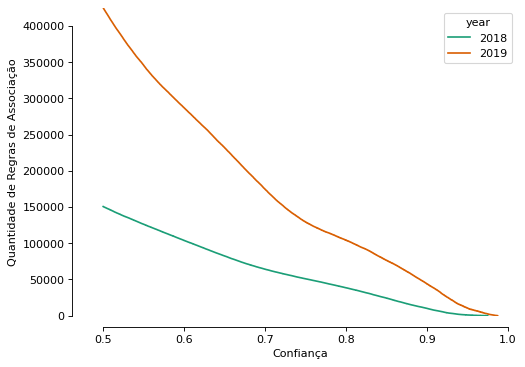

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confiança")
plt.ylabel("Quantidade de Regras de Associação")
ax = sns.ecdfplot(data=all_high_performance_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Support x Association Rules Qty - NOTA MUITO ABAIXO DA MÉDIA

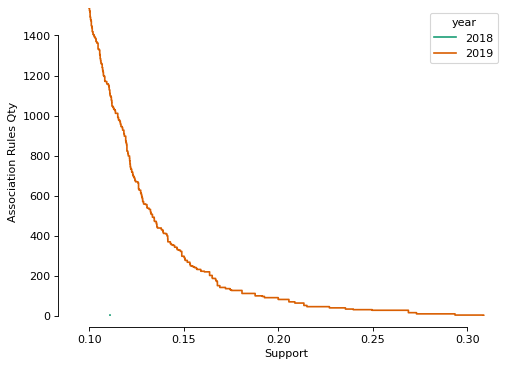

In [8]:
all_low_performance_rules = all_rules.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_low_performance_rules, stat="count", x="support", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty - NOTA MUITO ABAIXO DA MÉDIA

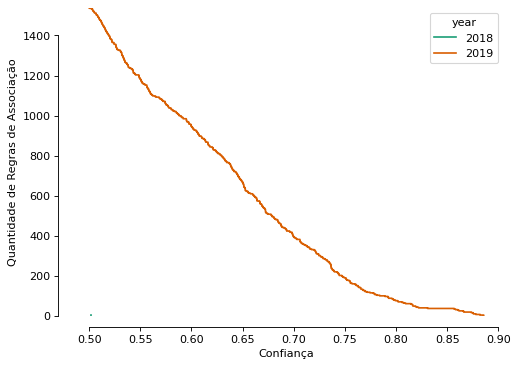

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confiança")
plt.ylabel("Quantidade de Regras de Associação")
ax = sns.ecdfplot(data=all_low_performance_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## Filter by relevant rules (lift > 1.1)

In [10]:
relevant_rules_table_2018 = rules_table_2018.query("lift > 1.1")
relevant_rules_table_2019 = rules_table_2019.query("lift > 1.1")

print("2018: " + str(relevant_rules_table_2018['items_base'].count()))
print("2019: " + str(relevant_rules_table_2019['items_base'].count()))

2018: 489510
2019: 1504737


## Recurring rules

In [11]:
intersec_all_years = pd.merge(relevant_rules_table_2018, relevant_rules_table_2019, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_a', '_b'))
intersec_all_years

,items_base,items_add,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
0,['Classe Social B'],['Branca'],0.216724,0.717404,1.190371,2018,0.198723,0.726011,1.288535,2019
1,['EM: Todo em escola privada (particular)'],['Branca'],0.272626,0.707450,1.173855,2018,0.282285,0.710682,1.261327,2019
2,['Mãe: Ensino Superior - Graduação'],['Branca'],0.146583,0.710608,1.179095,2018,0.153548,0.681737,1.209955,2019
3,['Pai: Ensino Superior - Graduação'],['Branca'],0.140865,0.704406,1.168804,2018,0.140617,0.686932,1.219177,2019
4,['Sul'],['Branca'],0.169575,0.768783,1.275623,2018,0.147972,0.800262,1.420316,2019
...,...,...,...,...,...,...,...,...,...,...
415297,"['Universidade', 'Branca', 'Bacharelado', 'Ent...",['Não entrei por cotas'],0.106728,0.976508,1.250330,2018,0.133910,0.982800,1.282417,2019
415298,"['Universidade', 'Branca', 'Não entrei por cot...",['NOTA: MUITO ACIMA DA MÉDIA'],0.106728,0.939877,1.296937,2018,0.133910,0.951206,1.631806,2019
415299,"['Universidade', 'Branca', 'Não entrei por cot...",['Entre 17 e 25 anos'],0.106728,0.830609,1.514753,2018,0.133910,0.785680,1.425097,2019
415300,"['Universidade', 'Branca', 'Não entrei por cot...",['EM: Todo em escola privada (particular)'],0.106728,0.762719,1.979212,2018,0.133910,0.830993,2.092107,2019


## Save results to a new CSV file

In [12]:
import os
intersec_all_years.to_csv('results/intersection-all-years.csv')

## View data of interest

In [13]:
intersec_all_years.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

,items_base,items_add,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
10,['Classe Social B'],['NOTA: MUITO ACIMA DA MÉDIA'],0.266558,0.882364,1.217576,2018,0.228301,0.834071,1.430861,2019
17,['EM: Todo em escola privada (particular)'],['NOTA: MUITO ACIMA DA MÉDIA'],0.338216,0.877650,1.211071,2018,0.332390,0.836826,1.435587,2019
35,['Entre 17 e 25 anos'],['NOTA: MUITO ACIMA DA MÉDIA'],0.448270,0.817495,1.128063,2018,0.415791,0.754178,1.293802,2019
50,['Mãe: Ensino Superior - Graduação'],['NOTA: MUITO ACIMA DA MÉDIA'],0.174009,0.843564,1.164036,2018,0.173590,0.770721,1.322183,2019
55,['Mãe: Pós-graduação'],['NOTA: MUITO ACIMA DA MÉDIA'],0.125693,0.888981,1.226706,2018,0.134233,0.828429,1.421181,2019
...,...,...,...,...,...,...,...,...,...,...
415268,"['Universidade', 'Branca', 'Não entrei por cot...","['NOTA: MUITO ACIMA DA MÉDIA', 'Entre 17 e 25 ...",0.106728,0.769781,1.717227,2018,0.133910,0.732862,1.762571,2019
415275,"['Universidade', 'Branca', 'Não entrei por cot...","['EM: Todo em escola privada (particular)', 'N...",0.106728,0.698092,2.064043,2018,0.133910,0.765712,2.303651,2019
415283,"['Universidade', 'Não entrei por cotas', 'Bach...","['Branca', 'NOTA: MUITO ACIMA DA MÉDIA']",0.106728,0.707817,1.513773,2018,0.133910,0.717006,1.838423,2019
415290,"['Universidade', 'Branca', 'Não entrei por cot...","['Bacharelado', 'NOTA: MUITO ACIMA DA MÉDIA']",0.106728,0.912219,1.465520,2018,0.133910,0.950660,1.655427,2019


In [14]:
intersec_all_years.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

,items_base,items_add,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
3358,"['Não entrei por cotas', 'Bacharelado', 'Priva...",['NOTA: MUITO ABAIXO DA MÉDIA'],0.111105,0.502242,1.824274,2018,0.187813,0.742255,1.779628,2019
23133,"['Não entrei por cotas', 'Bacharelado', 'Priva...","['NOTA: MUITO ABAIXO DA MÉDIA', 'Presente com ...",0.111105,0.502242,1.824274,2018,0.187813,0.742255,1.779628,2019
23135,"['Presente com resultado válido', 'Não entrei ...",['NOTA: MUITO ABAIXO DA MÉDIA'],0.111105,0.502242,1.824274,2018,0.187813,0.742255,1.779628,2019


## Generate WordCloud for NOTAS MUITO ACIMA DA MÉDIA

In [15]:
all_high = intersec_all_years.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

xss = all_high['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words = ''.join(flat_list)

words = words.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "").replace("(", "").replace(")", "")

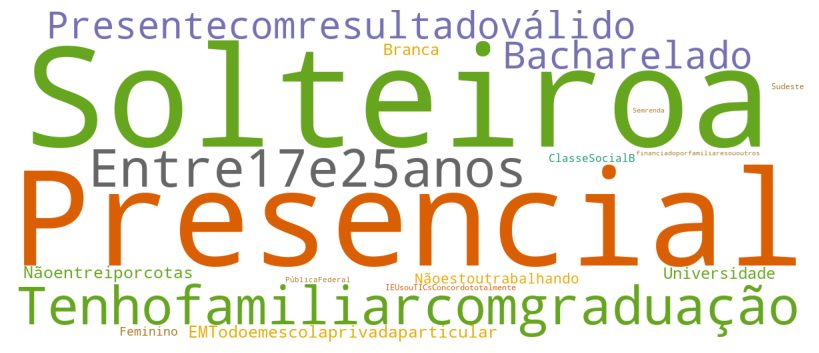

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words)
                 
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()

## Generate WordCloud for NOTAS MUITO ABAIXO DA MÉDIA

In [17]:
all_low = intersec_all_years.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

xss = all_low['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words2 = ''.join(flat_list)

words2 = words2.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "")

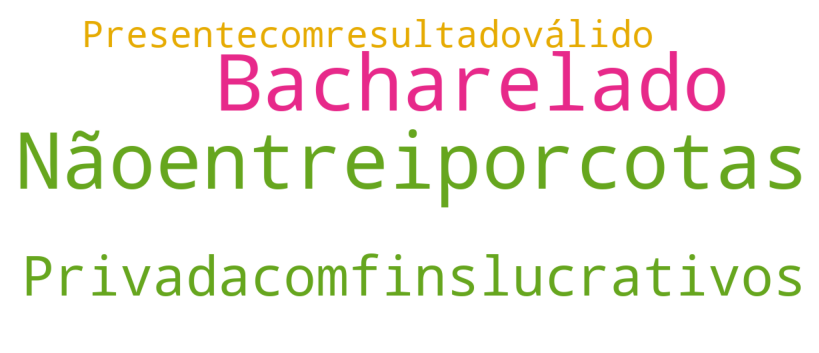

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words2)
                    
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()